#  Analyse the housing data and extract meaningful correlations 

This note contains exploartory analysis of the housing data. <br>


In [2]:
# import some essential modules 
import pandas as pd 
import numpy as np
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')

In [ ]:
# to add the the city and street name ... don't run this ..... cell
# define a function to obtain the city and street neames
def extract_house_address(name):
    city = name.split('.')[-4]
    street = name.split('.')[-2]
    house_type = name.split('.')[-5].split('\\')[-1]
    return city, street, house_type

city_list = []
street_list = []
house_type_list = []

for names in house_address_list:
    city, street, h_type = extract_house_address(names)
    city_list.append(city)
    street_list.append(street)
    house_type_list.append(h_type)


In [2]:
# read the data into a dataframe ..
real_estate_ = pd.read_parquet('Dutch_Housing_data.parquet')
path_final  =r'C:\Users\tosam\OneDrive\Desktop\Website_Contents\Page writeups\Housing Problem in Netherlands\Plots\\'

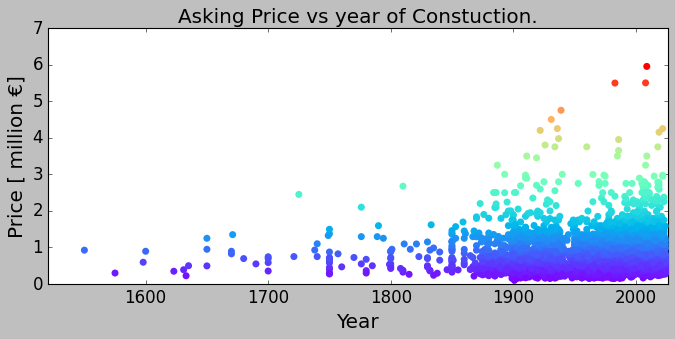

In [93]:
# Plot the asking price vs the year of construction.
plt.figure(figsize = (10,4))
plt.scatter(real_estate_['Const. year'], real_estate_['Asking Price']/1000000 , 
            edgecolor = 'none', s = 40, cmap = 'rainbow', c = real_estate_['Asking Price'], zorder = 3, clip_on = False)
plt.xlim([1520, 2026])
plt.ylim([0,7])
plt.xlabel('Year', size  =18)
plt.ylabel('Price [ million \N{euro sign}]', size  =18)
plt.title('Asking Price vs year of Constuction.',size  =18)
plt.tick_params(axis = 'both',labelsize =15)
plt.savefig(path_final+'Price_vs_year.png', dpi = 700, bbox_inches = 'tight')

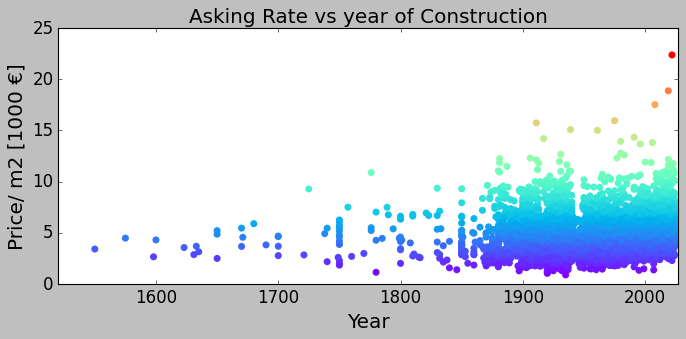

In [94]:
# Asking rate vs year of coinstruction 
plt.figure(figsize = (10,4))
plt.scatter(real_estate_['Const. year'], real_estate_['Asking Price /m2']/1000, 
            edgecolor = 'none', s = 40, cmap = 'rainbow', c = real_estate_['Asking Price /m2'], zorder = 3, clip_on = False)
plt.xlim([1520, 2027])
plt.ylim([0,25])
plt.xlabel('Year', size  =18)
plt.ylabel('Price/ m2 [1000 \N{euro sign}]', size  =18)
plt.title('Asking Rate vs year of Construction', size  =18)
plt.tick_params(axis = 'both',labelsize =15)
plt.savefig(path_final+ 'Price_m2_vs_year.png', dpi = 700, bbox_inches = 'tight')
plt.show()

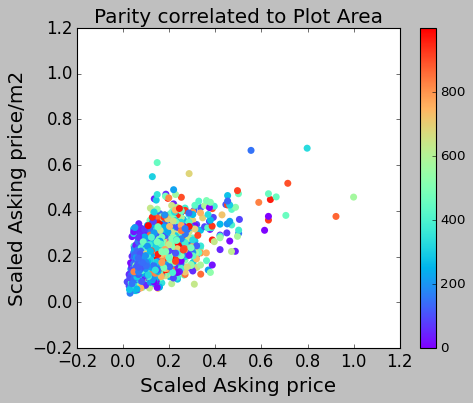

In [95]:
# parity to plot area
plt.figure(figsize = (6.5,5))
plt.plot( [0,1], [0,1], color = 'w', linestyle = '--',zorder = 1)
plt.scatter(real_estate_['Asking Price']/max(real_estate_['Asking Price']), 
            real_estate_['Asking Price /m2']/max(real_estate_['Asking Price /m2']), 
            edgecolor = 'none', s = 40, cmap = 'rainbow', c = real_estate_['Plot area'],zorder = 3)

plt.plot( [0,1], [0,1], color = 'w', linestyle = '--')
plt.colorbar()
plt.xlabel('Scaled Asking price', size  =18)
plt.ylabel('Scaled Asking price/m2', size  =18)
plt.title('Parity correlated to Plot Area', size  =18)
plt.tick_params(axis = 'both',labelsize =15)
plt.savefig(path_final+'parity_plot_area.png', dpi = 700, bbox_inches = 'tight')

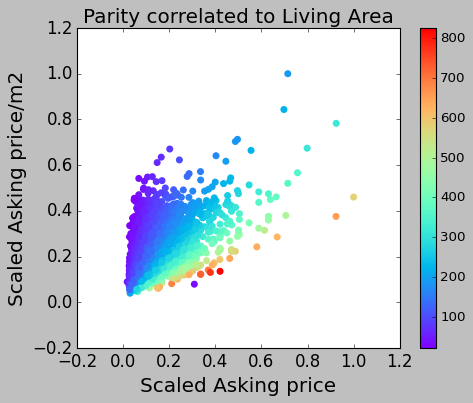

In [96]:
# price per unit area is computes based on living space 
plt.figure(figsize = (6.5,5))
plt.scatter(real_estate_['Asking Price']/max(real_estate_['Asking Price']), 
            real_estate_['Asking Price /m2']/max(real_estate_['Asking Price /m2']), 
            edgecolor = 'none', s = 40, cmap = 'rainbow', c = real_estate_['Living area'],zorder = 3)
plt.colorbar()
plt.plot( [0,1], [0,1], color = 'w', linestyle = '--',zorder = 1)
plt.xlabel('Scaled Asking price', size  =18)
plt.ylabel('Scaled Asking price/m2', size  =18)
plt.title('Parity correlated to Living Area', size  =18)
plt.tick_params(axis = 'both',labelsize =15)
plt.savefig(path_final + 'parity_living_area.png', dpi = 700, bbox_inches = 'tight')

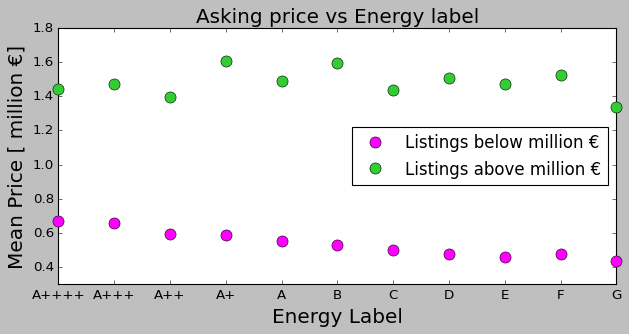

In [104]:
# energy label correlates with the corresponding mean asking price
real_estate_1 = real_estate_[real_estate_['Asking Price']<1000000]
Energie_group_ = real_estate_1.groupby(by = 'Energy label')['Asking Price'].mean()
data_ = pd.DataFrame()
data_['label'] = Energie_group_.index
data_['tags'] = [5, 4, 3, 2, 1, 6, 7, 8, 9, 10, 11]
data_['Means'] = Energie_group_.values
data_ = data_.sort_values(by = 'tags')

real_estate_1 = real_estate_[real_estate_['Asking Price']>=1000000]
Energie_group_ = real_estate_1.groupby(by = 'Energy label')['Asking Price'].mean()
data_1 = pd.DataFrame()
data_1['label'] = Energie_group_.index
data_1['tags'] = [5, 4, 3, 2, 1, 6, 7, 8, 9, 10, 11]
data_1['Means'] = Energie_group_.values

plt.figure(figsize = (9,4))
plt.plot(data_['label'], data_['Means'].values/1000000, linestyle = 'none', marker = 'o',markersize = 10, c = 'magenta', label= 'Listings below million \N{euro sign}' , zorder = 3, clip_on = False)
plt.plot(data_1['label'], data_1['Means'].values/1000000, linestyle = 'none', marker = 'o',markersize = 10, c = 'limegreen',  label= 'Listings above million \N{euro sign}', zorder = 3, clip_on = False)
plt.xlabel('Energy Label', size =18)
plt.ylabel('Mean Price [ million \N{euro sign}]', size  =18)
plt.legend(loc = 'center right', numpoints = 1, fontsize = 15)
plt.title('Asking price vs Energy label', size  =18)
plt.tick_params(axis = 'y',labelsize =12)
plt.ylim([0.3, 1.8])
plt.savefig(path_final + 'Price_vs_energy.png', dpi = 700, bbox_inches = 'tight')


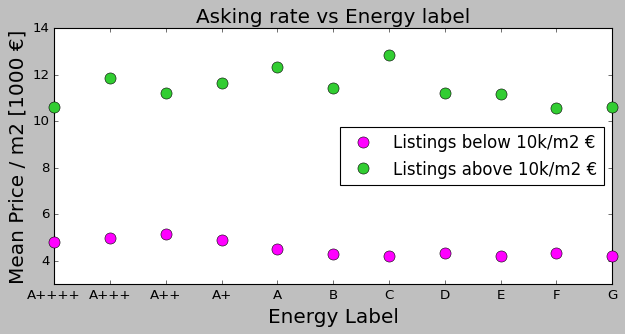

In [105]:
# energy label correlates with the corresponding mean asking price
real_estate_1 = real_estate_[real_estate_['Asking Price /m2']<10000]
Energie_group_ = real_estate_1.groupby(by = 'Energy label')['Asking Price /m2'].mean()
data_ = pd.DataFrame()
data_['label'] = Energie_group_.index
data_['tags'] = [5, 4, 3, 2, 1, 6, 7, 8, 9, 10, 11]
data_['Means'] = Energie_group_.values
data_ = data_.sort_values(by = 'tags')

real_estate_1 = real_estate_[real_estate_['Asking Price /m2']>=10000]
Energie_group_ = real_estate_1.groupby(by = 'Energy label')['Asking Price /m2'].mean()

data_1 = pd.DataFrame()
data_1['label'] = Energie_group_.index
data_1['tags'] = [5, 4, 3, 2, 1, 6, 7, 8, 9, 10, 11]
data_1['Means'] = Energie_group_.values
data_1 = data_1.sort_values(by = 'tags')

plt.figure(figsize = (9,4))

plt.plot(data_['label'], data_['Means'].values/1000, linestyle = 'none', marker = 'o',markersize = 10, c = 'magenta', label= 'Listings below 10k/m2 \N{euro sign}' , zorder = 3, clip_on = False)
plt.plot(data_1['label'], data_1['Means'].values/1000, linestyle = 'none', marker = 'o',markersize = 10, c = 'limegreen',  label= 'Listings above 10k/m2 \N{euro sign}', zorder = 3, clip_on = False)
plt.ylim([4, 14])
plt.xlabel('Energy Label', size =18)
plt.ylabel('Mean Price / m2 [1000 \N{euro sign}]', size  =18)
plt.legend(loc = 'center right', numpoints = 1, fontsize = 15)
plt.title('Asking rate vs Energy label', size  =18)
plt.tick_params(axis = 'y',labelsize =12)
plt.ylim([3, 14])
plt.savefig(path_final + 'price_m2_vs_energy.png', dpi = 700, bbox_inches = 'tight')

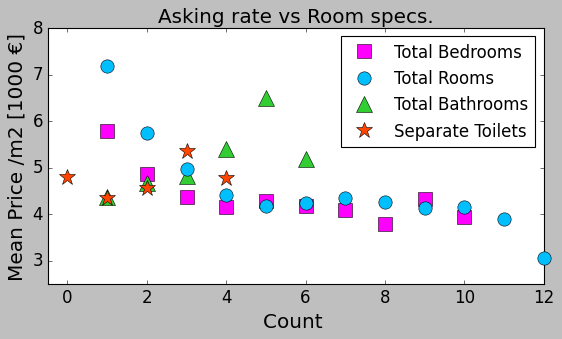

In [106]:
# room type vs price
real_estate_1 = real_estate_[(real_estate_['Rooms']<=12) & (real_estate_['Rooms']> 0)]

# group according to criterions
room_group = real_estate_1.groupby(by = 'Rooms')['Asking Price /m2'].mean()
bedroom_group = real_estate_1.groupby(by = 'Bedrooms')['Asking Price /m2'].mean()
bathroom_group = real_estate_1.groupby(by = 'Bathrooms')['Asking Price /m2'].mean()
Sep_toilet_group = real_estate_1.groupby(by = 'Separate toilet')['Asking Price /m2'].mean()

plt.figure(figsize = (8,4))

plt.plot(bedroom_group.index, bedroom_group.values/1000, linestyle = 'none' , markersize = 12,  marker = 's', 
         color = 'magenta', label = 'Total Bedrooms')
plt.plot(room_group.index, room_group.values/1000, linestyle = 'none' , markersize = 12, marker = 'o', 
         color = 'deepskyblue', label = 'Total Rooms', zorder = 3, clip_on = False)
plt.plot(bathroom_group.index, bathroom_group.values/1000, linestyle = 'none' , markersize = 14,  marker = '^', 
         color = 'limegreen', label = 'Total Bathrooms')
plt.plot(Sep_toilet_group.index, Sep_toilet_group.values/1000, linestyle = 'none' , markersize = 15,  marker = '*', 
         color = 'orangered', label = 'Separate Toilets')
plt.xlim([-0.5,12])
plt.ylim([2.5,8])
plt.xlabel('Count ', size =18)
plt.ylabel('Mean Price /m2 [1000 \N{euro sign}]', size  =18)
plt.legend(loc = 'upper right', numpoints = 1, fontsize = 15)
plt.title('Asking rate vs Room specs.', size  =18)
plt.tick_params(axis = 'both',labelsize =15)
plt.savefig(path_final + 'price_m2_vs_rooms.png', dpi = 700, bbox_inches = 'tight')

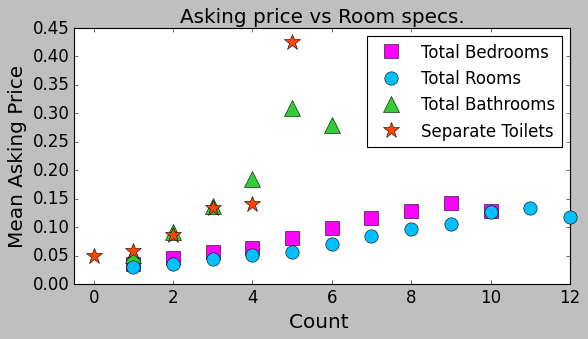

In [109]:
# bedrooms vs price
real_estate_1 = real_estate_[real_estate_['Rooms']<=12]

# group according to criterions
room_group = real_estate_1.groupby(by = 'Rooms')['Asking Price'].mean()/10e6
bedroom_group = real_estate_1.groupby(by = 'Bedrooms')['Asking Price'].mean()/10e6
bathroom_group = real_estate_1.groupby(by = 'Bathrooms')['Asking Price'].mean()/10e6
Sep_toilet_group = real_estate_1.groupby(by = 'Separate toilet')['Asking Price'].mean()/10e6

plt.figure(figsize = (8,4))

plt.plot(bedroom_group.index, bedroom_group.values, linestyle = 'none' , markersize = 12,  marker = 's', 
         color = 'magenta', label = 'Total Bedrooms')
plt.plot(room_group.index, room_group.values, linestyle = 'none' , markersize = 12, marker = 'o', 
         color = 'deepskyblue', label = 'Total Rooms', zorder = 3, clip_on = False)
plt.plot(bathroom_group.index, bathroom_group.values, linestyle = 'none' , markersize = 14,  marker = '^', 
         color = 'limegreen', label = 'Total Bathrooms')
plt.plot(Sep_toilet_group.index, Sep_toilet_group.values, linestyle = 'none' , markersize = 15,  marker = '*', 
         color = 'orangered', label = 'Separate Toilets')
plt.xlim([-0.5,12])
#plt.ylim([3000,10000])
plt.xlabel('Count ', size =18)
plt.ylabel('Mean Asking Price', size  =18)
plt.legend(loc = 'upper right', numpoints = 1, fontsize = 15)
plt.title('Asking price vs Room specs.', size = 18)
plt.tick_params(axis = 'both',labelsize =15)
plt.savefig(path_final + 'price_vs_rooms.png', dpi = 700, bbox_inches = 'tight')

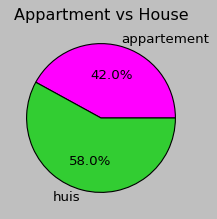

In [75]:
# house vs apartment 
plt.figure(figsize = (3,3))
houseType_group = real_estate_.groupby(by = 'House Type')['Asking Price'].mean()
_ = plt.pie(houseType_group.values/10000, labels = houseType_group.index,
            colors = ['magenta', 'limegreen'], autopct='%1.1f%%')
plt.title('Appartment vs House')
plt.savefig(path_final + 'house_vsapp.png', dpi = 700, bbox_inches = 'tight')

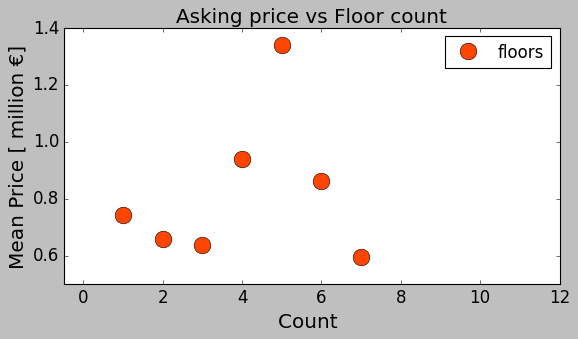

In [108]:
# relation between pricing and floors
plt.figure(figsize = (8,4))
real_estate_1 = real_estate_[real_estate_['House Type']=='huis']
floor_group = real_estate_1.groupby(by = 'Floors')['Asking Price'].mean()

plt.plot(floor_group.index[1:], floor_group.values[1:]/1000000, linestyle = 'none' , markersize = 15,  marker = 'o', 
         color = 'orangered', label = 'floors')
plt.xlim([-0.5,12])
#plt.ylim([3000,10000])
plt.xlabel('Count ', size =18)
plt.ylabel('Mean Price [ million \N{euro sign}]', size  =18)
plt.legend(loc = 'upper right', numpoints = 1, fontsize = 15)
plt.title('Asking price vs Floor count', size = 18)
plt.tick_params(axis = 'both',labelsize =15)
plt.savefig(path_final + 'price_vs_floors.png', dpi = 700, bbox_inches = 'tight')

Text(0.5, 0, 'Asking Price')

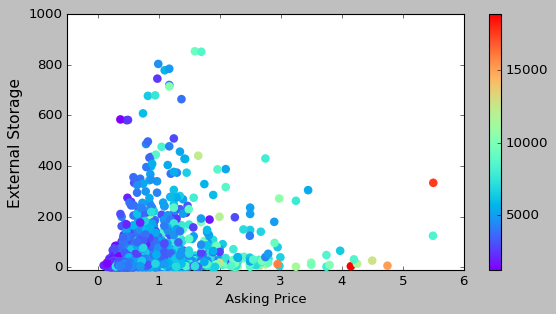

In [31]:
floor_group = real_estate_1.groupby(by = 'Floors')['Asking Price'].mean()
plt.figure(figsize = (8,4))

plt.scatter(real_estate_['Asking Price']/1E+6, real_estate_['Ext. Storage'], s = 60, 
            edgecolor = 'none', cmap = 'rainbow', c=real_estate_['Asking Price /m2'] , clip_on = False, zorder =3)
plt.xlim([-0.5,6])
plt.ylim([-10,1000])
plt.colorbar()
plt.ylabel('External Storage', size =14)
plt.xlabel('Asking Price', size  =12)

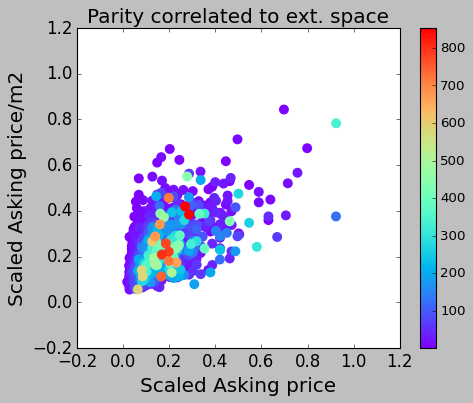

In [110]:
# external storage influence on space.
plt.figure(figsize = (6.5,5))
real_estate_1 = real_estate_.sort_values(by = ['Ext. Storage'])
plt.scatter(real_estate_1['Asking Price']/max(real_estate_1['Asking Price']), 
            real_estate_1['Asking Price /m2']/max(real_estate_1['Asking Price /m2']), 
            marker = 'o',edgecolor = 'none', s = 80, cmap = 'rainbow', c = real_estate_1['Ext. Storage'])
plt.colorbar()
plt.xlim([-0.2, 1.2])
plt.ylim([-0.2, 1.2])
plt.xlabel('Scaled Asking price', size = 18)
plt.ylabel('Scaled Asking price/m2', size = 18)
plt.title('Parity correlated to ext. space', size = 18)
plt.tick_params(axis = 'both',labelsize =15)
plt.savefig(path_final  + 'parity_external_storage.png', dpi = 700, bbox_inches = 'tight')